# COGS 108 - Final Project 

# Overview


In this project, I intended to identify park budgets over the course of 9 years.. I looked at a dataset of the San Diego Budget for each department from 2011 to 2019. From this analysis, I found a positive correlation, both between the years and park budgets. The data seems to suggest that as the years go by, park budgets increases in proportion to the overall budget.

# Name & GitHub ID

- Name: Jason Chau
- GitHub Username: JasonChau3

# Research Question

Are parks budgets getting cut more and more each year in proportion to other departments?



## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)https://www.npca.org/articles/2130-president-s-budget-proposal-damaging-to-national-parks-as-they-continue-to
- 2)https://www.tpl.org/blog/park-budgets-already-facing-cuts-economic-fallout-covid-19-deepens
- 3)https://www.brec.org/index.cfm/page/1808/n/153#:~:text=Parks%20provide%20intrinsic%20environmental%2C%20aesthetic,and%20workers%2C%20and%20attract%20retirees.

 Parks are a very important part of our society as it promotes well being of the public, provide community engagement,  help children learn and so on. Parks provides all of these bonuses, but with the recent surge of the coronavirus and economic downfall, president Trump is cutting 481 million dollars to the National Park Service with an additional 77 million dollars cut. This cut will prevent parks from getting the necessary repairs as well as cutting parks from 
 
 
 Given the recent cut on the parks budget due to the coronavirus, I wanted to see if the budget of the San Diego parks was already on a decline in the previous years.

# Hypothesis


My hypothesis is that San Diego's park budgets are on a general decline as the year's go by since I noticed that their are not alot of push for park's wellbeing when there is an economic downturn. In fact, They are about the first things to cut.

# Dataset(s)


- Dataset Name: San Diego Budget Data
- Link to the dataset: https://data.sandiego.gov/datasets/operating-actuals/
- Number of observations: 454891

This Dataset shows how the government funds each department, reason for the funding, account number, and the amount that the government funds these departments.



# Setup

In [3]:
## YOUR CODE HERE

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import geopandas
import patsy
import warnings
warnings.filterwarnings('ignore')

In [71]:


df = pd.read_csv('../data/actuals_operating_datasd.csv')
df

,amount,report_fy,fund_type,fund_number,dept_name,funds_center_number,account,account_number
0,349193.50,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Salaried Wages,500011
1,23875.99,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation,500014
2,7449.95,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Sick Leave/Vacation Accrual,500015
3,2942.31,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,A/L Bereavement Pay,500016
4,1532.45,17,General Fund,100000,Office of the Chief Operating Officer,1001000011,Vacation Pay In Lieu,500017
...,...,...,...,...,...,...,...,...
454886,145.00,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Equipment Rental - Motive Pool,512145
454887,300.00,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Promotion/Recognition - City Employees,512175
454888,517.44,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Wireless Stipend,512245
454889,8109.59,19,Special Revenue Funds,720057,Public Works - Contracts,2117000012,Hardware/Software - Discretionary,513104


In [72]:
df[df.dept_name == 'Parks & Recreation']['report_fy'].unique()

array([17, 14, 13, 12, 16, 15, 11, 18, 19], dtype=int64)

In [73]:
df.report_fy.unique()

array([17, 14, 13, 12, 16, 15, 11, 18, 19], dtype=int64)

# Data Cleaning

## Checking for Columns with too much missing values

First I want to check just how many values are missing in each column of the dataframe. Then remove all the columns that have a greater than a 50 percent null values. However, it seems that in this dataset, there are no missing values,  so we did not have to remove any of the columns. 

In [74]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
amount,amount,0.0
report_fy,report_fy,0.0
fund_type,fund_type,0.0
fund_number,fund_number,0.0
dept_name,dept_name,0.0
funds_center_number,funds_center_number,0.0
account,account,0.0
account_number,account_number,0.0


## Cutting down Data

Now I want to drop all of the columns that are not relevant to what I need.

In [75]:
df = df[['amount','report_fy','dept_name']]
df

,amount,report_fy,dept_name
0,349193.50,17,Office of the Chief Operating Officer
1,23875.99,17,Office of the Chief Operating Officer
2,7449.95,17,Office of the Chief Operating Officer
3,2942.31,17,Office of the Chief Operating Officer
4,1532.45,17,Office of the Chief Operating Officer
...,...,...,...
454886,145.00,19,Public Works - Contracts
454887,300.00,19,Public Works - Contracts
454888,517.44,19,Public Works - Contracts
454889,8109.59,19,Public Works - Contracts


## Cleaning up Data

I rename the columns of the dataframe to make it so that the column names won't be as ambiguous, but it still might not be so clear so I will be explaining the column names. I renamed amount to Dollars Allocated, and that stands for how much dollars have been allocated. I changed report_fy to Year Reported, which means the year that the government reported the dollars allocated. Lastly, I changed dept_name to 'Department Name', which is the name of the department. 

In [76]:
df= df.rename(columns={"amount": "Dollars Allocated", "report_fy": "Year Reported", 'dept_name': 'Department Name'})
df

,Dollars Allocated,Year Reported,Department Name
0,349193.50,17,Office of the Chief Operating Officer
1,23875.99,17,Office of the Chief Operating Officer
2,7449.95,17,Office of the Chief Operating Officer
3,2942.31,17,Office of the Chief Operating Officer
4,1532.45,17,Office of the Chief Operating Officer
...,...,...,...
454886,145.00,19,Public Works - Contracts
454887,300.00,19,Public Works - Contracts
454888,517.44,19,Public Works - Contracts
454889,8109.59,19,Public Works - Contracts


First I wanted to get a general understanding of the data by looking at the average values and general trend of the data.


# Data Analysis & Results


## Data Visualization

In [77]:
df.describe()

,Dollars Allocated,Year Reported
count,4.548910e+05,454891.000000
mean,1.106919e+05,15.023355
std,3.172724e+06,2.629687
min,-3.959406e+07,11.000000
25%,2.843750e+02,13.000000
50%,1.793740e+03,15.000000
75%,1.059678e+04,17.000000
max,5.385833e+08,19.000000


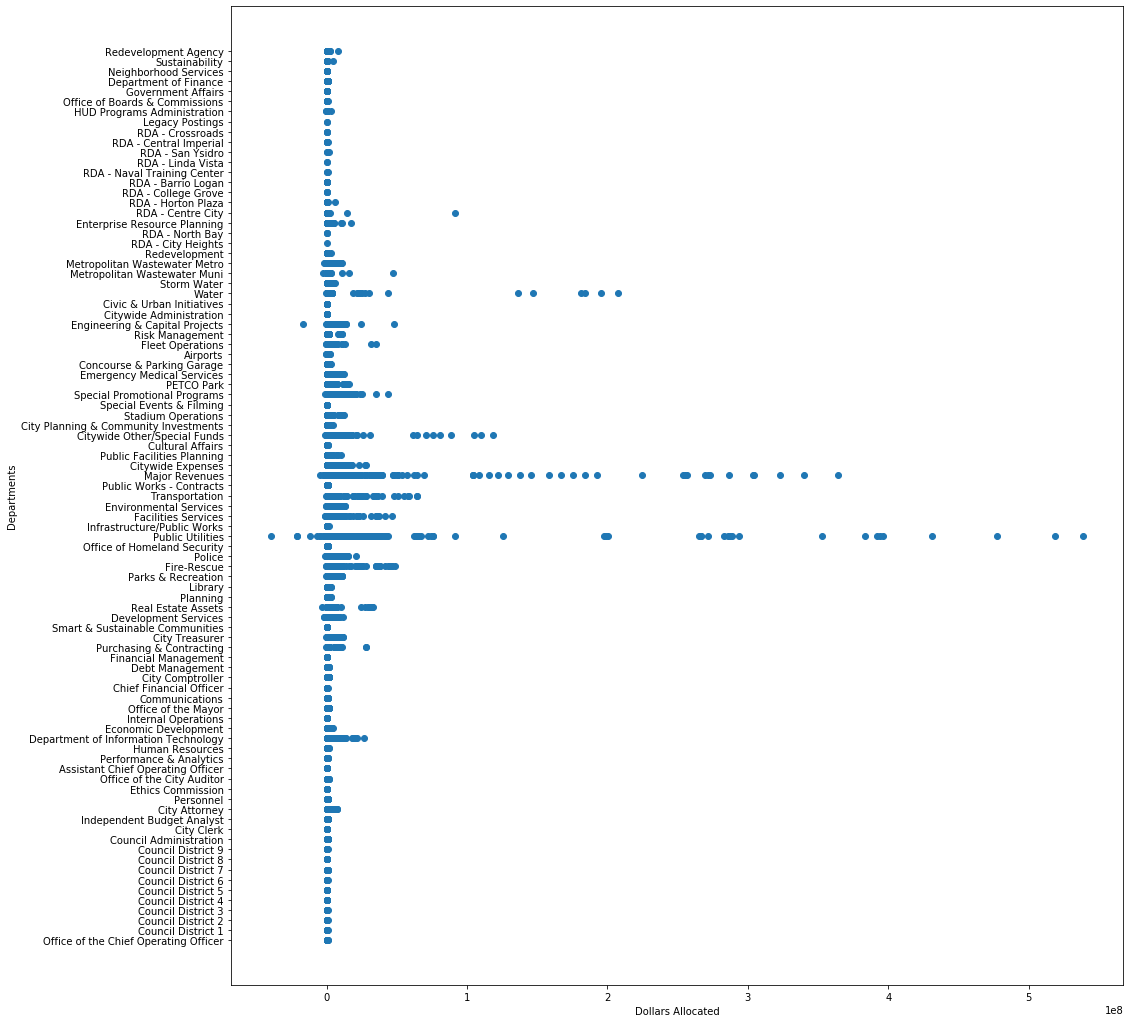

In [78]:
fig, ax = plt.subplots(figsize=(16,18))
ax.scatter(df['Dollars Allocated'], df['Department Name'])
ax.set_xlabel('Dollars Allocated')
ax.set_ylabel('Departments')
plt.show()

Figure 1: Scatterplot of the Dollars Allocated in each Department

It looks like their might be some outliers in the Dollars allocated especially in the Public Utilities Department and Major Revenues.So I check out the outliers.

In [79]:
parks_df = df[df['Department Name'] == 'Major Revenues']
print(max(parks_df['Dollars Allocated'].unique()))
print(min(parks_df['Dollars Allocated'].unique()))


par_df = df[df['Department Name'] == 'Public Utilities']
par_df

364302493.07
-4731682.08


,Dollars Allocated,Year Reported,Department Name
23494,-141640.00,17,Public Utilities
23495,2982.37,17,Public Utilities
23496,100.00,17,Public Utilities
23497,1.03,17,Public Utilities
23498,-653.19,17,Public Utilities
...,...,...,...
446915,0.97,19,Public Utilities
446916,14.17,19,Public Utilities
446917,12.79,19,Public Utilities
446918,67896.36,19,Public Utilities


Although the data seems alright, I want to make a note that their might still be outliers in the data that might skew it because I overlooked them.



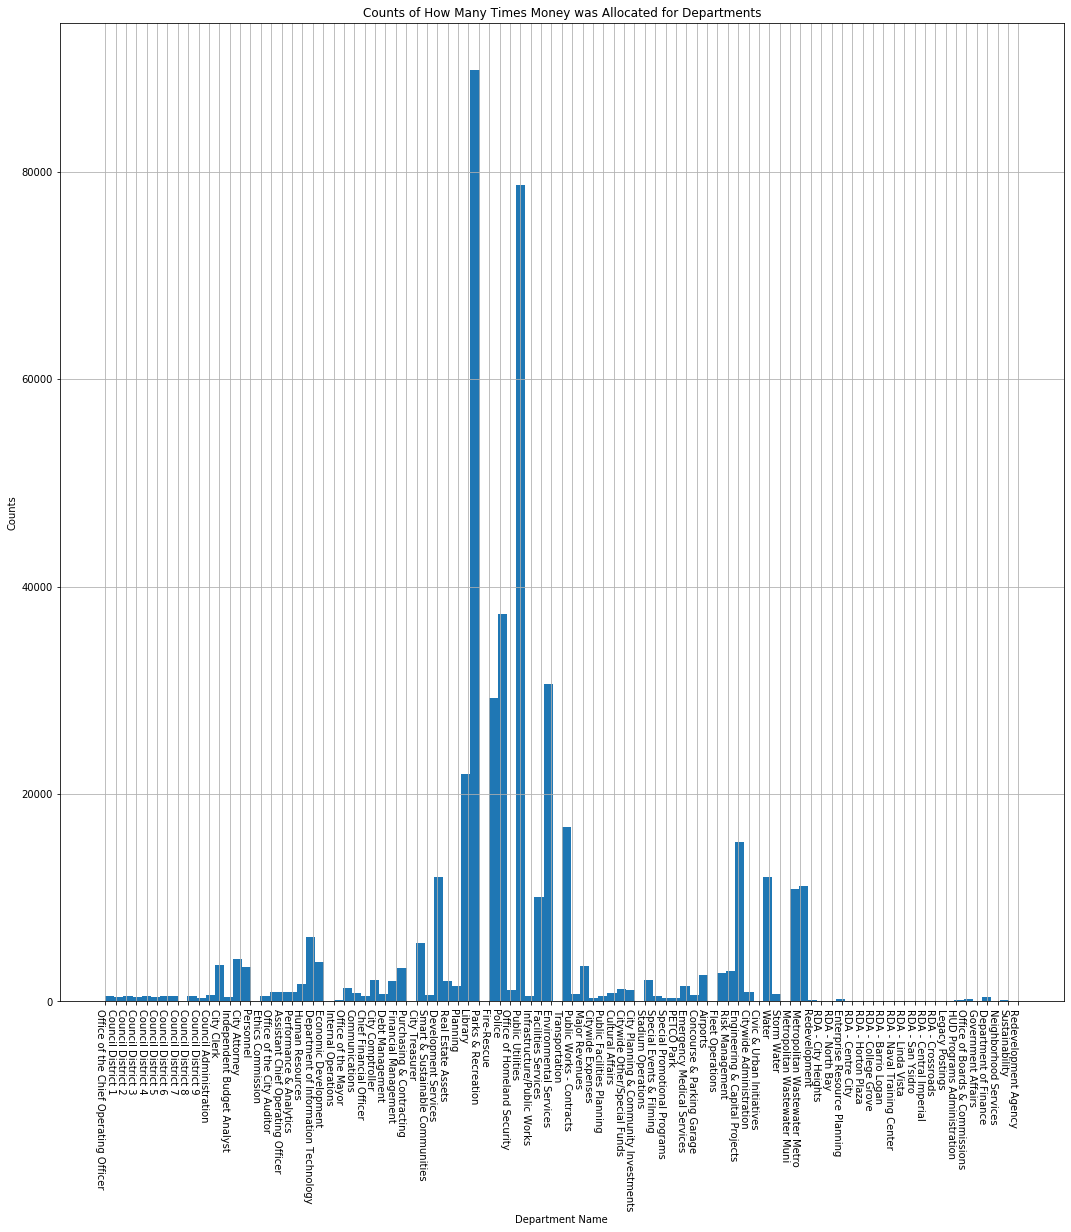

In [80]:
plt.figure(figsize=(18,18))
ax = df['Department Name'].hist(bins = 100)
plt.setp(ax.get_xticklabels(), rotation=-90, horizontalalignment='right')
plt.xlabel('Department Name')
plt.ylabel("Counts")
plt.title("Counts of How Many Times Money was Allocated for Departments")
ax
#df['Department Name'].hist(bins = 30)

Figure 2: Histogram of how many times money have been allocated to each department

It looks like the department 'Parks & Recreation' had the most amount of times that money has been allocated to. However, this does not neccessarily mean that it has recieved the most money. Lets take a deeper look at this. 

In [81]:
parks_df = df[df['Department Name'] == 'Parks & Recreation']
parks_df = parks_df.groupby('Year Reported').sum()
parks_df


,Dollars Allocated
Year Reported,
11,1.819405e+08
12,1.965323e+08
13,2.018419e+08
14,2.169659e+08
15,2.236179e+08
16,2.262815e+08
17,2.442289e+08
18,2.630864e+08
19,2.652765e+08


First, I get all the data that is in the department 'Parks & Recreation' and add up all the dollars allocated for every year

In [82]:
start, end = min(df['Year Reported']), max(df['Year Reported'])
start, end
years = np.arange(start,end+1)

In [83]:
parks_df.values

array([[1.81940528e+08],
       [1.96532304e+08],
       [2.01841876e+08],
       [2.16965881e+08],
       [2.23617860e+08],
       [2.26281544e+08],
       [2.44228881e+08],
       [2.63086426e+08],
       [2.65276529e+08]])

Text(0.5, 1.0, "Relationship between Year and SD Park's Budget")

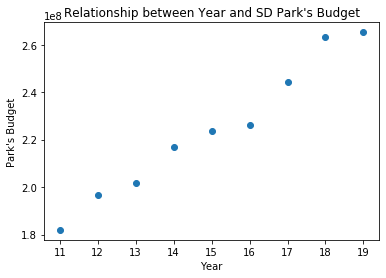

In [98]:
plt.scatter(x =years, y = parks_df.values)
plt.xlabel('Year')
plt.ylabel("Park's Budget")
plt.title("Relationship between Year and SD Park's Budget")

Figure 3: Relationship of Park & Recreation's budget over the course of 9 years.

Now in Figure 3, it looks like the budget of the Parks & Recreation are increasing year by year. However, we have not put in perspective of how much the economy has grown. So in order to put that in perspective, we are going to do this growth as a proportion of the total budget per year.

In [85]:
total_df = df.groupby(['Year Reported']).sum()
total_df

,Dollars Allocated
Year Reported,
11,4.760841e+09
12,5.206803e+09
13,5.000523e+09
14,5.301485e+09
15,5.410282e+09
16,5.711514e+09
17,6.002485e+09
18,6.371443e+09
19,6.587351e+09


In [88]:
prop_df = pd.DataFrame()
prop_df['years'] = years
prop_df['budget'] =  parks_df.values/total_df.values

Text(0.5, 1.0, "Relationship between Year and Proportion of San Diego Park's Budget")

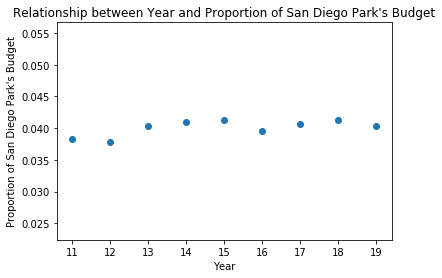

In [97]:
plt.scatter(x =years, y = parks_df.values/total_df.values)
plt.xlabel('Year')
plt.ylabel("Proportion of San Diego Park's Budget")
plt.title("Relationship between Year and Proportion of San Diego Park's Budget")

Figure 4: Relationship of Park & Recreation's budget in proportion with overall budget over the course of 9 years
Now graphing the proportion, we can clearly see that the overall trend of the budget have been relatively the same. We can see that the budget stays relatively at the 0.035 to 0.040 range

In [90]:
outcome, predictors = patsy.dmatrices('budget ~ years', prop_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 budget   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     4.923
Date:                Tue, 15 Dec 2020   Prob (F-statistic):             0.0620
Time:                        15:46:41   Log-Likelihood:                 50.016
No. Observations:                   9   AIC:                            -96.03
Df Residuals:                       7   BIC:                            -95.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0355      0.002     17.063      0.0

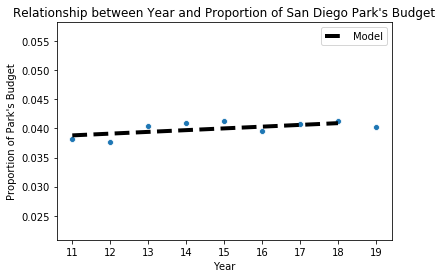

In [95]:
sns.scatterplot(x='years', y='budget', data=prop_df)
#generate model fit line
xs = np.arange(start, end)
ys = 0.0003  * xs + 0.0355
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Year')
plt.ylabel("Proportion of Park's Budget")
plt.title("Relationship between Year and Proportion of San Diego Park's Budget")
plt.legend();

Figure 5:  Relationship between Year and Proportion of Park's Budget with line fitted on it

Now that we have a best fit line through the points, we can clearly see that the trend of line is slightly positive. Therefore, the budget from 2011 to 2019 was a very slight uptrend. Before, we changed the value as a proportion of the entire budget, we saw that the points were strictly increasing, but when put in perspective with the data, we can see the difference.

# Ethics & Privacy


The dataset was given for use in the final project, so I had permission to use the dataset to analyze. The source of the dataset is from the official san Deigo website, so this type of data is available for the public to view and accessible.

Besides that the data is available to the public and is from the government, we should be concerned about the privacy of the data in the case that it has any personally identifiable information. However, after taking a good look at the data, we can see that the data is safe to use.

Since these are numbers, there should not be any potential for biasness. These data should not be a representative of all America's Budget but it should definetely be representative of the San Diego's Budget.

One possible unintended consequence of this analysis could be emphasizing that the park's budget is already increasing year by year and should not be a concern. Although the park's budgets have been increasing, there are many instances that park's cannot keep up with the rising costs of repairs and stability of the park. We should still definitely understand that the park need a higher budget to sustain themselves.

In terms of accuracy of the data, it is important to note that because the dataset was provided to me for the final project.  Morevoer, since it is data provided by the government, it should be very accurate otherwise the government would be lying to the general public.

# Conclusion & Discussion

In this project, I intended to identify park budgets over the course of 9 years. I looked at a dataset of the San Diego Budget for each department from 2011 to 2019. To analyze the data, I first had to clean up the data, but suprisingly enough the data was pretty clean already. After that, I then had to graph the relationship of the San Diego Park budget and the years. In that graph, we found out that the budget was strictly increasing by alot. However, we realized that we did not factor the growing economy into the equation. So we decided to graph the San Diego Park Budget as a proportion to the overall budget. When we decided to graph this out, we saw a line that was almost constant, but after we fitted a best fit line, we could conclude that the relationship was very slightly positive. I predicted wrongly saying that the park budgets were going to be lower and lower year by year, but the budget was getting higher and higher for each year.

There were several limitations to this project. First, This data only included San Diego Park's, and not the entirety of the United States, so we cannot give an accurate representation to the budget of Park's in general. It can only be used to represent Parks in San Diego. Next, the use of a simple linear regression model may not have been the best approach to analyzing the data, but given the lack of time, I could have explored other models that may have better represented the relationship. Moreover, I may have overlooked outliers that may have skewed the data. Another limitation is that this data does not take in the fact that the coronavirus is going about and causing an economic downturn.

This project may help to provide further insight into how San Diego's park budgets grow. It could help inform local officials concerned with increasing the park's budgets or decreasing it.

